### Classification

 - Predicting discreet categories vs. continuous numbers
 - ie, boy/girl, green/blue/black vs. stock price, quarterly earnings, etc.
 - Most techniques work for both regression & classification

**Linear Models**: Logistic Regression

**Random Forests**: Random Forest Classifiers

#### Linear Models and Classification

 - combine variable coefficients + intercept to arrive at a prediction
 - only difference is that output is passed through a non-linear activation function called the sigmoid.
  - the sigmoid function takes continuous numbers and transforms them into probabilities between 0 and 1

$$ \frac{1}{1 + e^{-x}} $$

#### Your Turn:

 - Create a function for the sigmoid
 - you can access the operation for e with the command np.exp()
 - To test your results:
  - sigmoid(0) = 0.5
  - sigmoid(1) = 0.73
  - sigmoid(2) = 0.88
  - sigmoid(-1) = 0.26
  - sigmoid(-2) = 0.119

In [1]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [2]:
print(sigmoid(0))
print(sigmoid(1))
print(sigmoid(2))
print(sigmoid(-1))
print(sigmoid(-2))

0.5
0.7310585786300049
0.8807970779778823
0.2689414213699951
0.11920292202211755


### Case Study:  Who Survived The Titanic?

We'll enter the following Kaggle competition to demonstrate how classification works:  https://www.kaggle.com/c/titanic

Item to discover:  what chances does someone have of surviving?

In [3]:
import pandas as pd
train = pd.read_csv('../data/titanic/train.csv')
test  = pd.read_csv('../data/titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### A Little Exploratory Data Analysis

In [6]:
import seaborn as sns

sns.catplot(x='Sex', y='Survived', kind='bar', data=train);

C:\Users\Jonat\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


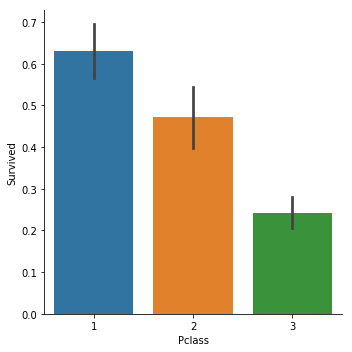

In [7]:
sns.catplot(x='Pclass', y='Survived', kind='bar', data=train);

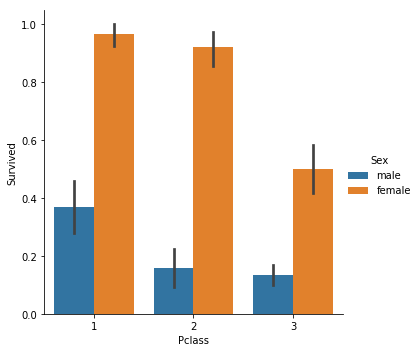

In [8]:
sns.catplot(x='Pclass', y='Survived', kind='bar', hue='Sex', data=train);

### Let's Create A Simple Two Variable Model......

In [9]:
X_train = train.loc[:, ['Sex', 'Pclass']]
y_train = train['Survived']
X_test  = test.loc[:, ['Sex', 'Pclass']]

In [10]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Pclass'], drop_first=True)
X_test  = pd.get_dummies(X_test, columns=['Sex', 'Pclass'], drop_first=True)

### Logistic Regression

 - How you use linear models for classification
 - Based off of the sigmoid function
 - Has arguments for regularization parameter C: the (almost equivalent) as alpha
 - Also has choice of l1 or l2 penalty

In [11]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

 - **C**:  the equivalent of alpha in lasso and ridge regression
  - Is inverted.  Ie, value of 0.1 for C equates to 1/10 for regularization parameter
  - Highest values signal lowest strength of regularization, and vice versa
 - **penalty**:  can be either l1, or l2
  - ie, you can specify what kind of penalty you want to use
  - essentially Ridge and Lasso Regression wrapped up into one.

In [12]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
# you can then use the predict method to predic out of sample data
logreg.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [14]:
# you can also use the predict_proba function to get probabilities for each outcome
logreg.predict_proba(X_test)

array([[0.89503473, 0.10496527],
       [0.41462909, 0.58537091],
       [0.75093089, 0.24906911],
       [0.89503473, 0.10496527],
       [0.41462909, 0.58537091],
       [0.89503473, 0.10496527],
       [0.41462909, 0.58537091],
       [0.75093089, 0.24906911],
       [0.41462909, 0.58537091],
       [0.89503473, 0.10496527],
       [0.89503473, 0.10496527],
       [0.60521334, 0.39478666],
       [0.11295975, 0.88704025],
       [0.75093089, 0.24906911],
       [0.11295975, 0.88704025],
       [0.20028547, 0.79971453],
       [0.75093089, 0.24906911],
       [0.89503473, 0.10496527],
       [0.41462909, 0.58537091],
       [0.41462909, 0.58537091],
       [0.60521334, 0.39478666],
       [0.89503473, 0.10496527],
       [0.11295975, 0.88704025],
       [0.60521334, 0.39478666],
       [0.11295975, 0.88704025],
       [0.89503473, 0.10496527],
       [0.11295975, 0.88704025],
       [0.89503473, 0.10496527],
       [0.60521334, 0.39478666],
       [0.89503473, 0.10496527],
       [0.

In [15]:
# this is how you choose the chance that someone will survive
logreg.predict_proba(X_test)[:, 1]

array([0.10496527, 0.58537091, 0.24906911, 0.10496527, 0.58537091,
       0.10496527, 0.58537091, 0.24906911, 0.58537091, 0.10496527,
       0.10496527, 0.39478666, 0.88704025, 0.24906911, 0.88704025,
       0.79971453, 0.24906911, 0.10496527, 0.58537091, 0.58537091,
       0.39478666, 0.10496527, 0.88704025, 0.39478666, 0.88704025,
       0.10496527, 0.88704025, 0.10496527, 0.39478666, 0.10496527,
       0.24906911, 0.24906911, 0.58537091, 0.58537091, 0.39478666,
       0.10496527, 0.58537091, 0.58537091, 0.10496527, 0.10496527,
       0.10496527, 0.39478666, 0.10496527, 0.79971453, 0.88704025,
       0.10496527, 0.39478666, 0.10496527, 0.88704025, 0.58537091,
       0.39478666, 0.24906911, 0.79971453, 0.88704025, 0.24906911,
       0.10496527, 0.10496527, 0.10496527, 0.10496527, 0.88704025,
       0.10496527, 0.24906911, 0.10496527, 0.58537091, 0.39478666,
       0.79971453, 0.58537091, 0.39478666, 0.39478666, 0.88704025,
       0.58537091, 0.10496527, 0.58537091, 0.39478666, 0.88704

In [16]:
# logistic regression is a linear model, so you have coefficients and intercepts
logreg.intercept_

array([2.06085883])

In [17]:
logreg.coef_

array([[-2.48809433, -0.67634771, -1.7159975 ]])

In [18]:
coeffs = pd.DataFrame({
    'Variable': X_train.columns,
    'Weight'  : logreg.coef_[0]
})

coeffs

,Variable,Weight
0,Sex_male,-2.488094
1,Pclass_2,-0.676348
2,Pclass_3,-1.715997


In [19]:
# let's create a variable called output that recreates the predictions
output = X_train.dot(logreg.coef_.T) + logreg.intercept_
output

,0
0,-2.143233
1,2.060859
2,0.344861
3,2.060859
4,-2.143233
5,-2.143233
6,-0.427235
7,-2.143233
8,0.344861
9,1.384511


In [20]:
# and this gives us our predictions
sigmoid(output)

,0
0,0.104965
1,0.887040
2,0.585371
3,0.887040
4,0.104965
5,0.104965
6,0.394787
7,0.104965
8,0.585371
9,0.799715


In [21]:
# now let's submit predictions
preds = logreg.predict(X_test)

lm_predictions = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived'   : preds
})

In [22]:
lm_predictions.to_csv('../data/titanic/lm_submissions.csv', index=False)

### Random Forest Classifiers

 - Work in a manner that's almost identical to their Regressor Counterpart
 - Classify a sample by taking a majority vote of each leaf value
 - Basic syntax is the same

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [24]:
# and we'll fit a quick model
rf.fit(X_train, y_train)

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
rf.feature_importances_

array([0.71278892, 0.03139943, 0.25581165])

In [42]:
importances = pd.DataFrame({
    'Features': X_train.columns,
    'Importance': rf.feature_importances_
})

importances

,Features,Importance
0,Sex_male,0.712789
1,Pclass_2,0.031399
2,Pclass_3,0.255812


In [25]:
rf.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [26]:
rf.predict_proba(X_test)

array([[0.86607214, 0.13392786],
       [0.51834828, 0.48165172],
       [0.84083881, 0.15916119],
       [0.86607214, 0.13392786],
       [0.51834828, 0.48165172],
       [0.86607214, 0.13392786],
       [0.51834828, 0.48165172],
       [0.84083881, 0.15916119],
       [0.51834828, 0.48165172],
       [0.86607214, 0.13392786],
       [0.86607214, 0.13392786],
       [0.62553242, 0.37446758],
       [0.02762347, 0.97237653],
       [0.84083881, 0.15916119],
       [0.02762347, 0.97237653],
       [0.08097277, 0.91902723],
       [0.84083881, 0.15916119],
       [0.86607214, 0.13392786],
       [0.51834828, 0.48165172],
       [0.51834828, 0.48165172],
       [0.62553242, 0.37446758],
       [0.86607214, 0.13392786],
       [0.02762347, 0.97237653],
       [0.62553242, 0.37446758],
       [0.02762347, 0.97237653],
       [0.86607214, 0.13392786],
       [0.02762347, 0.97237653],
       [0.86607214, 0.13392786],
       [0.62553242, 0.37446758],
       [0.86607214, 0.13392786],
       [0.

In [27]:
# make the predictions
rf_preds = rf.predict(X_test)

In [28]:
# pass them into a dataframe
rf_submissions = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived'   : rf_preds
})

In [29]:
# make random forest submissions
rf_submissions.to_csv('../data/titanic/rf_submissions.csv', index=False)

### Grid Search

A very useful way to make comparisons between different models.

Sets up a graph of options to try out, according to different parameters that you specify.  

Produces useful output for model results that are useful for analysis.

Can incorporate cross-validation into your model tuning automatically.

Basically happens in 3 different steps: 

 - define parameters that you want to test
 - load them into a grid
 - fit (this can take a while!)
 - look at ~best_params~ and ~cv_results_~ attributes

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
# set up the parameters of the model you'd like to fit
param_grid = {
    'penalty': ['l1', 'l2'],
    'C'      : [.0001, .001, .01, .1, 1, 10, 100, 1000, 10000],
}

In [32]:
# load it into the grid
grid = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=10)

In [33]:
# fit it on your training data
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
# get the version that gave you the best fit
grid.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [35]:
# and best of all, the results of all your cross-validation
grid_results = pd.DataFrame(grid.cv_results_);

C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\Jonat\Anaconda\lib\site-packages\sklearn\utils\de

In [36]:
# and here are the results from each round
grid_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003145,0.004862,0.003693,0.006212,0.0001,l1,"{'C': 0.0001, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
1,0.004588,0.006744,0.001813,0.004704,0.0001,l2,"{'C': 0.0001, 'penalty': 'l2'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
2,0.003545,0.006707,0.000929,0.002788,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
3,0.002671,0.003342,0.001958,0.004780,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317
4,0.003609,0.003584,0.001252,0.002438,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.611111,0.611111,0.617978,...,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.61596,0.616438,0.616162,0.000317


In [37]:
# every column returned by our new dataframe
grid_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_penalty', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score',
       'split0_train_score', 'split1_train_score', 'split2_train_score',
       'split3_train_score', 'split4_train_score', 'split5_train_score',
       'split6_train_score', 'split7_train_score', 'split8_train_score',
       'split9_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [38]:
# let's trim this up a bit
cols = ['param_C', 'param_penalty', 'mean_test_score', 'std_test_score', 'rank_test_score', 'mean_train_score', 'std_train_score']
grid_results = grid_results.loc[:, cols]

In [39]:
grid_results.sort_values(by='rank_test_score')

,param_C,param_penalty,mean_test_score,std_test_score,rank_test_score,mean_train_score,std_train_score
8,1,l1,0.786756,0.027926,1,0.786756,0.003101
15,1000,l2,0.786756,0.027926,1,0.786756,0.003101
14,1000,l1,0.786756,0.027926,1,0.786756,0.003101
13,100,l2,0.786756,0.027926,1,0.786756,0.003101
12,100,l1,0.786756,0.027926,1,0.786756,0.003101
11,10,l2,0.786756,0.027926,1,0.786756,0.003101
10,10,l1,0.786756,0.027926,1,0.786756,0.003101
9,1,l2,0.786756,0.027926,1,0.786756,0.003101
17,10000,l2,0.786756,0.027926,1,0.786756,0.003101
7,0.1,l2,0.786756,0.027926,1,0.786756,0.003101


**Useful Things To Do With Your Grid Results**:

 - groupby operations
 - run regressions on a target variable, like mean_test_score

### Your Turn:

Create your own grid search for a random forest, and create one that tests the following parameters:

 - min_sample_leaf
 - n_estimators
 - max_features
 
**Try and use a more complicated dataset than the one used here, to make your results more interesting!**